In [1]:
import sqlite3

In [3]:
db=sqlite3.connect("student_database01.db")

In [4]:
cur=db.cursor()

In [6]:
cur.execute("create table student_1(id int primary key, name text, marks int)")

In [7]:
cur.execute("insert into student_1(id,name,marks) values (1,'John',90)")

In [8]:
cur.execute("insert into student_1 values(2,'Teens', 100)")

In [11]:
results = cur.execute("select * from student_1")

In [12]:
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)


In [14]:
cur.execute("insert into student_1 values(3,'Andrew',70),(4,'Gim',71),(5,'JACK',94)")

In [17]:
results=cur.execute('select * from student_1')

In [18]:
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)
(4, 'Gim', 71)
(5, 'JACK', 94)


In [20]:
cur.execute("insert into student_1 values(6,'Dorsey',56),(7,'David',45),(8,'Kim',70)")

In [23]:
results = cur.execute("select * from student_1")

In [24]:
results.fetchall()

[(1, 'John', 90),
 (2, 'Teens', 100),
 (3, 'Andrew', 70),
 (4, 'Gim', 71),
 (5, 'JACK', 94),
 (6, 'Dorsey', 56),
 (7, 'David', 45),
 (8, 'Kim', 70)]

In [27]:
results = cur.execute("select * from student_1 where id = 1")
for row in results:
    print(row)

(1, 'John', 90)


In [28]:
#shows the upper 3 data
results = cur.execute('select * from student_1 limit 3')
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)


In [30]:
results = cur.execute("select * from student_1 where name='John'")
for row in results:
    print(row)

(1, 'John', 90)


In [32]:
reults= cur.execute("select * from student_1 where marks>60")
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)
(4, 'Gim', 71)
(5, 'JACK', 94)
(8, 'Kim', 70)


In [34]:
results = cur.execute("select * from student_1 where marks>60 and marks<90")
for row in results:
    print(row)

(3, 'Andrew', 70)
(4, 'Gim', 71)
(8, 'Kim', 70)


In [37]:
#show all the names in ascending order
results = cur.execute("select * from student_1 order by name asc")
for row in results:
    print(row)

(3, 'Andrew', 70)
(7, 'David', 45)
(6, 'Dorsey', 56)
(4, 'Gim', 71)
(5, 'JACK', 94)
(1, 'John', 90)
(8, 'Kim', 70)
(2, 'Teens', 100)


In [39]:
results = cur.execute("select * from student_1 order by name desc")
for row in results:
    print(row)

(2, 'Teens', 100)
(8, 'Kim', 70)
(1, 'John', 90)
(5, 'JACK', 94)
(4, 'Gim', 71)
(6, 'Dorsey', 56)
(7, 'David', 45)
(3, 'Andrew', 70)


In [41]:
results = cur.execute("select * from student_1 where name='David' and marks  = 45")
for row in results:
    print(row)

(7, 'David', 45)


In [42]:
results = cur.execute("select * from student_1 where id=2 or marks = 70")
for row in reults:
    print(row)

(2, 'Teens', 100)
(3, 'Andrew', 70)
(8, 'Kim', 70)


In [43]:
results = cur.execute("select * from student_1 where marks = min(marks)")
for row in results:
    print(row)

OperationalError: misuse of aggregate function min()

In [45]:
results = cur.execute("select min(marks) from student_1")
for row in results:
    print(row)

(45,)


In [47]:
results = cur.execute("select name from student_1 where marks=45")
for row in results:
    print(row)

('David',)


In [48]:
results = cur.execute("select * from student_1 where name like 'D%'")
for row in results:
    print(row)

(6, 'Dorsey', 56)
(7, 'David', 45)


In [49]:
#print the rows where the name of the second letter is a
results = cur.execute("select * from student_1 where name like '_a%'")
for row in results:
    print(row)

(5, 'JACK', 94)
(7, 'David', 45)


In [50]:
#show the rows where the name ends with m
results = cur.execute("select * from student_1 where name like '%m'")
for row in results:
    print(row)

(4, 'Gim', 71)
(8, 'Kim', 70)


In [53]:
#show the data which contains the name e
results = cur.execute("select * from student_1 where name like '%a%'")
for row in results:
    print(row)

(3, 'Andrew', 70)
(5, 'JACK', 94)
(7, 'David', 45)


In [54]:
#display the name which contains four letters
results = cur.execute("select * from student_1 where name like '____'")
for row in results:
    print(row)

(1, 'John', 90)
(5, 'JACK', 94)


In [56]:
#select the rows where marks is not 70
results = cur.execute("select * from student_1 where marks not in (70)")
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(4, 'Gim', 71)
(5, 'JACK', 94)
(6, 'Dorsey', 56)
(7, 'David', 45)


In [60]:
results = cur.execute("select * from student_1 where name NOT in ('Kim')")
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)
(4, 'Gim', 71)
(5, 'JACK', 94)
(6, 'Dorsey', 56)
(7, 'David', 45)


In [63]:
#update data
cur.execute("update student_1 set marks = 81 where id = 4")
results=cur.execute("select * from student_1")
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)
(4, 'Gim', 81)
(5, 'JACK', 94)
(6, 'Dorsey', 56)
(7, 'David', 45)
(8, 'Kim', 70)


In [64]:
#delete any unwanted records
cur.execute("delete from student_1 where id=6")
results = cur.execute("select * from student_1")
for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teens', 100)
(3, 'Andrew', 70)
(4, 'Gim', 81)
(5, 'JACK', 94)
(7, 'David', 45)
(8, 'Kim', 70)


In [65]:
cur.execute("delete from student_1 where name='Teens'")
results = cur.execute("select * from student_1")
for row in results:
    print(row)

(1, 'John', 90)
(3, 'Andrew', 70)
(4, 'Gim', 81)
(5, 'JACK', 94)
(7, 'David', 45)
(8, 'Kim', 70)


In [66]:
#deleting the table
#cur.execute("drop table student_1")

In [67]:
cur.execute("create table sport(id int primary key, sport_name text unique, date_of_event date, country text not null)")

In [68]:
cur.execute("insert into sport values(1,'Cricket', 2021-11-19,'England')")

In [70]:
cur.rowcount

1

In [71]:
cur.execute("Create table employee(id int primary key, name text, salary real, department text, post text, dateofjoin date)")

In [75]:
cur.execute("insert into employee values(1,'Jack',9000,'HR','Manager0','2019-07-09')")

In [76]:
cur.execute("insert into employee values(2,'Andrew',7000,'IT','Engineer','2015-04-06')")

In [77]:
cur.execute("insert into employee values(3,'Thomas',6000,'HR','Manager','2016-06-14')")

In [78]:
cur.execute("insert into employee values(4,'Rudolf',8000,'IT','Engineer','2012-08-23')")

In [79]:
cur.execute("insert into employee values(5,'Suzen',10000,'Sales','Sales Executive','2018-02-19')")

In [80]:
results=cur.execute("select * from employee")

In [81]:
results.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09'),
 (2, 'Andrew', 7000.0, 'IT', 'Engineer', '2015-04-06'),
 (3, 'Thomas', 6000.0, 'HR', 'Manager', '2016-06-14'),
 (4, 'Rudolf', 8000.0, 'IT', 'Engineer', '2012-08-23'),
 (5, 'Suzen', 10000.0, 'Sales', 'Sales Executive', '2018-02-19')]

In [83]:
resluts=cur.execute("select id,name from employee")
for row in resluts:
    print(row)

(1, 'Jack')
(2, 'Andrew')
(3, 'Thomas')
(4, 'Rudolf')
(5, 'Suzen')


In [85]:
results=cur.execute("select id,name from employee where salary>8000")
for row in results:
    print(row)

(1, 'Jack')
(5, 'Suzen')


In [86]:
results=cur.execute("select min(salary) from employee")
for row in results:
    print(row)

(6000.0,)


In [87]:
results=cur.execute("select count(id) from employee")
for row in results:
    print(row)

(5,)


In [88]:
results=cur.execute("select distinct(department) from employee")
for row in results:
    print(row)

('HR',)
('IT',)
('Sales',)


In [91]:
results = cur.execute("select sum(salary),post from employee group by post ")
results.fetchall()

[(15000.0, 'Engineer'),
 (6000.0, 'Manager'),
 (9000.0, 'Manager0'),
 (10000.0, 'Sales Executive')]

In [92]:
results=cur.execute("select sum(salary),department from employee group by department ")

In [93]:
results.fetchall()

[(15000.0, 'HR'), (15000.0, 'IT'), (10000.0, 'Sales')]

In [96]:
cur.execute("create table course (courseid int primary key, coursename text, duration int)")

In [99]:
cur.execute("create table student_new(roll_no int primary key, student_name text, age int , courseid int, foreign key(courseid) references course(courseid))")

In [100]:
cur.execute("insert into course values(78,'Data Science',12),(56,'Python course',4),(101,'DataBase',7)")

In [102]:
cur.execute("insert into student_new values(1,'Jack',22,78),(2,'John',21,56),(3,'Rudolf',18,78),(4,'Jim',21,56)")

In [103]:
results=cur.execute("select courseid from course where coursename='Data Science'")

In [104]:
results.fetchall()

[(78,)]

In [112]:
results=cur.execute("select * from student_new where courseid=(select courseid from course where coursename='Data Science')")

In [113]:
results.fetchall()

[(1, 'Jack', 22, 78), (3, 'Rudolf', 18, 78)]

In [114]:
for row in results:
    print(row)

In [115]:
import numpy as np

In [119]:
p=np.array([[11,12],[13,14]])

In [120]:
n

array([[11, 12],
       [13, 14]])

In [121]:
p.shape

(2, 2)

In [122]:
p=np.array([[1,2,3],[4,5,6]])

In [123]:
p

array([[1, 2, 3],
       [4, 5, 6]])

In [126]:
p.shape[0]

2

In [131]:
d=p.reshape([3,2])

In [132]:
d

array([[1, 2],
       [3, 4],
       [5, 6]])

In [133]:
p.shape

(2, 3)

In [139]:
e=d.reshape([1,6])[0]
e

array([1, 2, 3, 4, 5, 6])

In [141]:
e.max()

6

In [143]:
e.size #number of elements in the array

6

In [145]:
e.itemsize

4

In [148]:
a=np.array([[1,2],[3,4],[5,6]],dtype='float64')

In [149]:
a

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [150]:
a.itemsize
#itemsize gives the size of an element in the array

8

In [151]:
y=np.arange(10)

In [152]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
y.reshape([2,5])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [155]:
y=np.arange(25)

In [157]:
y.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [158]:
y=np.arange(10,25)

In [163]:
y=y.reshape([3,5])

In [164]:
y.ndim

2

In [165]:
y.itemsize

4

In [167]:
y.size

15

In [168]:
b=np.array([[1,2,3],[4,5,6]],dtype='float32')

In [169]:
b

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [171]:
b.ravel()

array([1., 2., 3., 4., 5., 6.], dtype=float32)

In [174]:
b.reshape([1,6])[0]

array([1., 2., 3., 4., 5., 6.], dtype=float32)

In [176]:
np.zeros([3,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [178]:
np.ones([3,4],dtype='int32')

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [181]:
a=np.array([1,2,3])
b=2
print(a**b)

[1 4 9]


In [184]:
b=np.random.random([2,3])
b

array([[0.82115325, 0.7953608 , 0.59963516],
       [0.10417057, 0.4025232 , 0.56682985]])

In [185]:
c=np.ones([2,3])
c

array([[1., 1., 1.],
       [1., 1., 1.]])

In [186]:
b+c

array([[1.82115325, 1.7953608 , 1.59963516],
       [1.10417057, 1.4025232 , 1.56682985]])

In [187]:
b=np.arange(3)

In [188]:
c=np.exp(b)

In [189]:
c

array([1.        , 2.71828183, 7.3890561 ])

In [190]:
d=np.sqrt(c)

In [191]:
d

array([1.        , 1.64872127, 2.71828183])

In [195]:
d=np.array([np.nan,45,25,36,np.nan,89])

In [196]:
d

array([nan, 45., 25., 36., nan, 89.])

In [198]:
np.random.rand(2,3)#gives positive numbers as output

array([[0.80741965, 0.91201118, 0.16034978],
       [0.56264236, 0.42937877, 0.84062212]])

In [199]:
np.random.randn(2,3)#gives standrd normal distribution

array([[-0.23832858, -0.32033376, -0.71805105],
       [ 1.62730717,  2.27848065,  2.73640279]])

In [200]:
import pandas as pd
import numpy as np

In [201]:
a=pd.Series([1,2,3,4])

In [202]:
a

0    1
1    2
2    3
3    4
dtype: int64

In [203]:
b=pd.Series([55,66,77,88,99])

In [204]:
b

0    55
1    66
2    77
3    88
4    99
dtype: int64

In [207]:
c=pd.Series([11,28,34,54],index=[10,20,30,40],dtype='float32')

In [208]:
c

10    11.0
20    28.0
30    34.0
40    54.0
dtype: float32

In [209]:
c[20]

28.0

In [214]:
b[1:5]

1    66
2    77
3    88
4    99
dtype: int64

In [215]:
data=np.array([1,54,544])
s=pd.Series(data)

In [216]:
s

0      1
1     54
2    544
dtype: int32

In [219]:
demodict={'Name':'Sayan','Age':25}
n=pd.Series(demodict)
print(n)

Name    Sayan
Age        25
dtype: object


In [220]:
n['Name']

'Sayan'

In [222]:
data=pd.DataFrame([1,2,34])

In [223]:
data

,0
0,1
1,2
2,34


In [225]:
data={'Name':"Virat",'Runs':243,'innings':3,'balls':56}
df=pd.Series(data)

In [226]:
df

Name       Virat
Runs         243
innings        3
balls         56
dtype: object

In [227]:
df['Runs']

243

In [230]:
data=[['Alex',10],['Bob',12],['Clarke',13]]
df=pd.DataFrame(data,columns=['Name','Age'],dtype='float32')
df

,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


In [231]:
data={'Name':['Tom','Jack','Steve','Ricky'],'Age':[28,34,29,42]}
df=pd.DataFrame(data)

In [232]:
df

,Name,Age
0,Tom,28
1,Jack,34
2,Steve,29
3,Ricky,42


In [233]:
data={'a':[1,2,np.nan],'b':[10,20,30]}

In [234]:
df=pd.DataFrame(data)

In [235]:
df

,a,b
0,1.0,10
1,2.0,20
2,NaN,30


In [236]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])

In [237]:
df

,A,B,C,D
0,0.743946,0.081067,-0.008090,0.219654
1,-0.513608,-0.598551,0.428655,0.624166
2,-0.613797,0.468313,-1.454170,0.625776
3,0.398650,0.383475,0.301550,1.947442
4,-0.561738,2.351744,-1.266223,-2.866831
5,0.051253,-0.570957,1.051906,-0.361690
6,-1.283966,-0.104592,-1.510234,0.969831
7,-0.152942,-0.586931,0.392277,1.950458


In [238]:
df.loc[:,'A']

0    0.743946
1   -0.513608
2   -0.613797
3    0.398650
4   -0.561738
5    0.051253
6   -1.283966
7   -0.152942
Name: A, dtype: float64

In [239]:
df.loc[:,['A','B']]

,A,B
0,0.743946,0.081067
1,-0.513608,-0.598551
2,-0.613797,0.468313
3,0.398650,0.383475
4,-0.561738,2.351744
5,0.051253,-0.570957
6,-1.283966,-0.104592
7,-0.152942,-0.586931


In [241]:
df.iloc[:,0:-1]

,A,B,C
0,0.743946,0.081067,-0.008090
1,-0.513608,-0.598551,0.428655
2,-0.613797,0.468313,-1.454170
3,0.398650,0.383475,0.301550
4,-0.561738,2.351744,-1.266223
5,0.051253,-0.570957,1.051906
6,-1.283966,-0.104592,-1.510234
7,-0.152942,-0.586931,0.392277


In [242]:
df.iloc[0:5,0:-1]

,A,B,C
0,0.743946,0.081067,-0.008090
1,-0.513608,-0.598551,0.428655
2,-0.613797,0.468313,-1.454170
3,0.398650,0.383475,0.301550
4,-0.561738,2.351744,-1.266223


In [244]:
print(df.iloc[1:3,:])
print(df.iloc[:,1:3])

          A         B         C         D
1 -0.513608 -0.598551  0.428655  0.624166
2 -0.613797  0.468313 -1.454170  0.625776
          B         C
0  0.081067 -0.008090
1 -0.598551  0.428655
2  0.468313 -1.454170
3  0.383475  0.301550
4  2.351744 -1.266223
5 -0.570957  1.051906
6 -0.104592 -1.510234
7 -0.586931  0.392277


In [ ]:
#parse_dates will convert string data type to date dtataype
#parde_dates=['HireDate'] willconvert string datatype to date datatype
#parse_dates=['HireDate'] will convert string datatype to Date datatypoe
#parse_dates=['HireDate'] will convert string datatype to Date datatype
#parse_dates=['HireDate'] will convert string datatype to Date datatype
#parse_dates=['HireDate'] will convert string datatype to Date datatype
#parse_dates=['HireDarte'] will convert string datatype to Date datatype

In [246]:
#reading tsv files
df=pd.read_csv('agedata.tsv',sep='\t')
df

,Sno,Name,Age
0,1,John,5
1,2,Jack,10
2,3,Lisa,8
3,4,Sweta,11
4,5,Bret,14
5,6,Nikolus,10


In [248]:
import pandas as pd
df=pd.read_csv('empl.csv')
df

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [302]:
df=pd.read_csv('empl.csv',index_col=['SNo'],dtype={"Salary":np.float64})

In [256]:
df

,Name,Age,City,Country,Salary
SNo,,,,,
1,Tom,28.0,Toronto,Canada,20000.0
2,Lee,31.0,Edmonto,Canada,3900.0
3,Dave,34.0,Toronto,Canada,8000.0
4,Anik,26.0,HongKong,Asia,66672.0
5,kamal,30.0,NaN,America,NaN
6,Geet,NaN,HongKong,Asia,30007.0
7,Steven,43.0,BayArea,America,8300.0
8,Ram,38.0,Hyderabad,Asia,54666.0
9,hari,50.0,newyork,America,67666.0


In [257]:
df['Salary'].dtype

dtype('float64')

In [258]:
df['Salary'].min()

3900.0

In [259]:
df['Salary'].mean()

33739.94736842105

In [268]:
df.count()

Name       22
Age        19
City       19
Country    22
Salary     19
dtype: int64

In [269]:
df['Name'].count()

22

In [274]:
list(df['Name'].unique())

['Tom',
 'Lee',
 'Dave',
 'Anik',
 'kamal',
 'Geet',
 'Steven',
 'Ram',
 'hari',
 'yami',
 'Andrew',
 'soham',
 'Grig',
 'Kiara']

In [271]:
df['Name'].nunique()

14

In [275]:
df.describe()

,Age,Salary
count,19.000000,19.000000
mean,32.421053,33739.947368
std,7.174924,23151.188084
min,22.000000,3900.000000
25%,27.000000,8888.000000
50%,31.000000,33451.000000
75%,36.000000,54666.000000
max,50.000000,67666.000000


In [276]:
df.describe

<bound method NDFrame.describe of        Name   Age       City  Country   Salary
SNo                                           
1       Tom  28.0    Toronto   Canada  20000.0
2       Lee  31.0    Edmonto   Canada   3900.0
3      Dave  34.0    Toronto   Canada   8000.0
4      Anik  26.0   HongKong     Asia  66672.0
5     kamal  30.0        NaN  America      NaN
6      Geet   NaN   HongKong     Asia  30007.0
7    Steven  43.0    BayArea  America   8300.0
8       Ram  38.0  Hyderabad     Asia  54666.0
9      hari  50.0    newyork  America  67666.0
11     yami   NaN    newyork  America   8888.0
12     Anik  26.0   HongKong     Asia  66672.0
13    kamal  30.0        NaN  America  34344.0
14     Geet  22.0   HongKong     Asia  30007.0
15   Steven  43.0        NaN  America   8300.0
16      Ram  38.0  Hyderabad     Asia  54666.0
17     hari   NaN    newyork  America  67666.0
18     yami  27.0    newyork  America   8888.0
19      Lee  31.0    Edmonto   Canada      NaN
20   Andrew  34.0      Con

In [277]:
df

,Name,Age,City,Country,Salary
SNo,,,,,
1,Tom,28.0,Toronto,Canada,20000.0
2,Lee,31.0,Edmonto,Canada,3900.0
3,Dave,34.0,Toronto,Canada,8000.0
4,Anik,26.0,HongKong,Asia,66672.0
5,kamal,30.0,NaN,America,NaN
6,Geet,NaN,HongKong,Asia,30007.0
7,Steven,43.0,BayArea,America,8300.0
8,Ram,38.0,Hyderabad,Asia,54666.0
9,hari,50.0,newyork,America,67666.0


In [278]:
df.drop([14,15,16,17],axis=0,inplace=True)

In [279]:
df

,Name,Age,City,Country,Salary
SNo,,,,,
1,Tom,28.0,Toronto,Canada,20000.0
2,Lee,31.0,Edmonto,Canada,3900.0
3,Dave,34.0,Toronto,Canada,8000.0
4,Anik,26.0,HongKong,Asia,66672.0
5,kamal,30.0,NaN,America,NaN
6,Geet,NaN,HongKong,Asia,30007.0
7,Steven,43.0,BayArea,America,8300.0
8,Ram,38.0,Hyderabad,Asia,54666.0
9,hari,50.0,newyork,America,67666.0


In [280]:
df.drop(['Name'],axis=1)

,Age,City,Country,Salary
SNo,,,,
1,28.0,Toronto,Canada,20000.0
2,31.0,Edmonto,Canada,3900.0
3,34.0,Toronto,Canada,8000.0
4,26.0,HongKong,Asia,66672.0
5,30.0,NaN,America,NaN
6,NaN,HongKong,Asia,30007.0
7,43.0,BayArea,America,8300.0
8,38.0,Hyderabad,Asia,54666.0
9,50.0,newyork,America,67666.0


In [281]:
df.drop(['Age','Salary'],axis=1)

,Name,City,Country
SNo,,,
1,Tom,Toronto,Canada
2,Lee,Edmonto,Canada
3,Dave,Toronto,Canada
4,Anik,HongKong,Asia
5,kamal,NaN,America
6,Geet,HongKong,Asia
7,Steven,BayArea,America
8,Ram,Hyderabad,Asia
9,hari,newyork,America


In [283]:
df=pd.read_csv('hrdata.csv')

In [284]:
df

,Name,HireDate,Salary,SickDaysRemaining
0,Graham Chapman,03/15/14,50000.0,10
1,John Cleese,06/01/15,65000.0,8
2,Eric Idle,05/12/14,45000.0,10
3,Terry Jones,11/01/13,70000.0,3
4,Terry Gilliam,08/12/14,48000.0,7
5,Michael Palin,05/23/13,66000.0,8


In [285]:
df.dtypes

Name                  object
HireDate              object
Salary               float64
SickDaysRemaining      int64
dtype: object

In [286]:
df.columns

Index(['Name', 'HireDate', 'Salary', 'SickDaysRemaining'], dtype='object')

In [289]:
df['HireDate']=pd.to_datetime(df['HireDate'])

In [290]:
df

,Name,HireDate,Salary,SickDaysRemaining,HiraDate
0,Graham Chapman,2014-03-15,50000.0,10,2014-03-15
1,John Cleese,2015-06-01,65000.0,8,2015-06-01
2,Eric Idle,2014-05-12,45000.0,10,2014-05-12
3,Terry Jones,2013-11-01,70000.0,3,2013-11-01
4,Terry Gilliam,2014-08-12,48000.0,7,2014-08-12
5,Michael Palin,2013-05-23,66000.0,8,2013-05-23


In [291]:
df.drop(columns=['HiraDate'],axis=1)

,Name,HireDate,Salary,SickDaysRemaining
0,Graham Chapman,2014-03-15,50000.0,10
1,John Cleese,2015-06-01,65000.0,8
2,Eric Idle,2014-05-12,45000.0,10
3,Terry Jones,2013-11-01,70000.0,3
4,Terry Gilliam,2014-08-12,48000.0,7
5,Michael Palin,2013-05-23,66000.0,8


In [292]:
daterange=pd.date_range(start='1/1/2020',end='1/10/2020',freq='D')

In [293]:
daterange

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [294]:
daterange=pd.date_range(start='1/1/2020',end='1/10/2020',freq='M')

In [295]:
daterange

DatetimeIndex([], dtype='datetime64[ns]', freq='M')

In [296]:
import datetime

In [297]:
dt=datetime.datetime.now()

In [298]:
dt+pd.to_timedelta(10,unit='D')

datetime.datetime(2023, 5, 7, 21, 13, 39, 679326)

In [ ]:
df['Day']=df['Hiredate']

In [305]:
df['City'].unique()

array(['Toronto', 'Edmonto', 'HongKong', nan, 'BayArea', 'Hyderabad',
       'newyork', 'Congo', 'Angola', 'Finland', 'London'], dtype=object)

In [307]:
df[df['City']=='newyork']

,Name,Age,City,Country,Salary
SNo,,,,,
9,hari,50.0,newyork,America,67666.0
11,yami,NaN,newyork,America,8888.0
17,hari,NaN,newyork,America,67666.0
18,yami,27.0,newyork,America,8888.0


In [313]:
df[(df['City']=='newyork') | (df['Salary']>50000)]

,Name,Age,City,Country,Salary
SNo,,,,,
4,Anik,26.0,HongKong,Asia,66672.0
8,Ram,38.0,Hyderabad,Asia,54666.0
9,hari,50.0,newyork,America,67666.0
11,yami,NaN,newyork,America,8888.0
12,Anik,26.0,HongKong,Asia,66672.0
16,Ram,38.0,Hyderabad,Asia,54666.0
17,hari,NaN,newyork,America,67666.0
18,yami,27.0,newyork,America,8888.0


In [320]:
df.isnull().sum()

Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='SNo'>

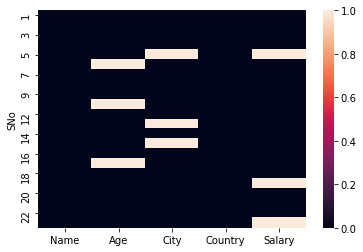

In [333]:
sns.heatmap(df.isnull())

In [334]:
df.corr()

,Age,Salary
Age,1.000000,0.041372
Salary,0.041372,1.000000


<AxesSubplot:>

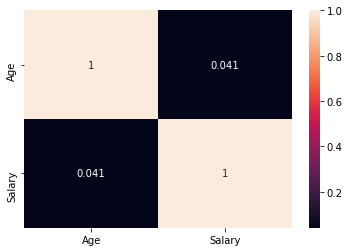

In [335]:
sns.heatmap(df.corr(),annot=True)

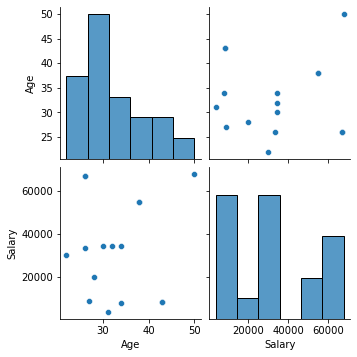

In [336]:
sns.pairplot(df)

In [343]:
from scipy.stats import zscore
z=np.abs(zscore(df['Age']))

In [344]:
z

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [345]:
df.dtypes

Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [346]:
df.isnull().sum()

Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [347]:
df['Age']=df['Age'].replace(np.NAN,df['Age'].mean())

In [348]:
df.isnull().sum()

Name       0
Age        0
City       3
Country    0
Salary     3
dtype: int64

In [338]:
df.columns

Index(['Name', 'Age', 'City', 'Country', 'Salary'], dtype='object')